In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install transformers==2.8.0

In [ ]:
!pip install tensorflow==1.13.1

In [ ]:
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/train_QC_data.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/test_QC_data.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/val_QC_data.csv" /content


In [ ]:
import pandas as pd
train_data = pd.read_csv("train_QC_data.csv")
test_data = pd.read_csv("test_QC_data.csv")
val_data = pd.read_csv("val_QC_data.csv")
train_data


,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold
0,VASoL_2008_3_34,34,1,C,1,0,Virginia Standards of Learning - Science,3,2008,matter_properties of objects_TEXT,A student is asked to bring something that fee...,NaN,Train,Easy
1,MCAS_2015_8_6,6,1,B,1,0,MCAS,8,2015,celestial_FEATURES_STELLAR,Which of the following statements best describ...,NaN,Test,Easy
2,Mercury_SC_417677,417677,1,B,1,0,Mercury,4,2015,energy_LIGHT_REFLECT,A polished metal ball looks very shiny and bri...,NaN,Test,Challenge
3,Mercury_7230423,7230423,1,A,1,0,Mercury,9,2015,LIFE_EXTINCTION_MASSEX,Which was a main force driving extensive speci...,NaN,Test,Easy
4,NYSEDREGENTS_2007_8_6,6,1,2,1,0,NYSEDREGENTS,8,2007,Life_functions_features and functions_CELLBIO_...,Compared to the amount of hereditary informati...,NaN,Train,Challenge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,Mercury_402502,402502,1,D,1,0,Mercury,8,2015,matter_chemistry_periodic table,"According to the periodic table, argon is foun...",NaN,Test,Challenge
5593,MCAS_2006_9_20,20,1,B,1,0,MCAS,9,2006,FOR_MOMENTUM,Which of the following has the least momentum?...,NaN,Train,Challenge
5594,NYSEDREGENTS_2013_8_35,35,1,4,1,0,NYSEDREGENTS,8,2013,Life_functions_features and functions_PLANT_PH...,The amount of which greenhouse gas in the air ...,NaN,Test,Easy
5595,Mercury_7082670,7082670,1,C,1,0,Mercury,7,2015,energy_LIGHT_electromagnetic spectrum,The visible light spectrum can be subdivided a...,NaN,Test,Easy


In [ ]:
from google.colab import files

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
train_data["QCLabel"].value_counts()

celestial_cycles                           106
matter_chemistry_periodic table             85
matter_chemistry_atomic                     79
matter_CHANGES_CHEMICAL                     72
science_INFERENCE_observation               69
                                          ... 
matter_properties of material_FLAMMABLE      1
matter_measurement_UNIT_TIME                 1
EARTH_human impacts_RES_MINING               1
science_INFERENCE_INFERENCE                  1
force_lift                                   1
Name: QCLabel, Length: 416, dtype: int64

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_save_categorized_reduced_nov" /content/

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Loading BERT tokenizer...


In [ ]:
test_data["QCLabel"].value_counts()

Life_reproduction_DNA inheritance_inheritance                   26
celestial_cycles                                                26
Life_functions_features and functions_PLANT_PHOTOSYNTH          22
matter_chemistry_atomic                                         21
science_INFERENCE_experiment design                             19
                                                                ..
Life_functions_features and functions_CELLBIO_ORG_ORGSYSTEMS     1
energy_WAVES_FREQWL                                              1
matter_MIXTURES_ALLOYS                                           1
Life_cycle_GROWTH_PROC                                           1
EARTH_GEO_FORMATIONS_EARTH_WEATHER_erosion_erosion               1
Name: QCLabel, Length: 352, dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit_transform(pd.concat([train_data['QCLabel'],test_data['QCLabel']]))
train_data['label'] = LE.transform(train_data['QCLabel'])
train_data.head()

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold,label
0,VASoL_2008_3_34,34,1,C,1,0,Virginia Standards of Learning - Science,3,2008,matter_properties of objects_TEXT,A student is asked to bring something that fee...,NaN,Train,Easy,399
1,MCAS_2015_8_6,6,1,B,1,0,MCAS,8,2015,celestial_FEATURES_STELLAR,Which of the following statements best describ...,NaN,Test,Easy,260
2,Mercury_SC_417677,417677,1,B,1,0,Mercury,4,2015,energy_LIGHT_REFLECT,A polished metal ball looks very shiny and bri...,NaN,Test,Challenge,293
3,Mercury_7230423,7230423,1,A,1,0,Mercury,9,2015,LIFE_EXTINCTION_MASSEX,Which was a main force driving extensive speci...,NaN,Test,Easy,103
4,NYSEDREGENTS_2007_8_6,6,1,2,1,0,NYSEDREGENTS,8,2007,Life_functions_features and functions_CELLBIO_...,Compared to the amount of hereditary informati...,NaN,Train,Challenge,171


In [ ]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

In [ ]:
get_labels(204)

'Life_functions_features and functions_PLANT_VASCULAR'

In [ ]:
train_data.iloc[14,1]

'29'

In [ ]:
train_data

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold,label
0,VASoL_2008_3_34,34,1,C,1,0,Virginia Standards of Learning - Science,3,2008,matter_properties of objects_TEXT,A student is asked to bring something that fee...,NaN,Train,Easy,399
1,MCAS_2015_8_6,6,1,B,1,0,MCAS,8,2015,celestial_FEATURES_STELLAR,Which of the following statements best describ...,NaN,Test,Easy,260
2,Mercury_SC_417677,417677,1,B,1,0,Mercury,4,2015,energy_LIGHT_REFLECT,A polished metal ball looks very shiny and bri...,NaN,Test,Challenge,293
3,Mercury_7230423,7230423,1,A,1,0,Mercury,9,2015,LIFE_EXTINCTION_MASSEX,Which was a main force driving extensive speci...,NaN,Test,Easy,103
4,NYSEDREGENTS_2007_8_6,6,1,2,1,0,NYSEDREGENTS,8,2007,Life_functions_features and functions_CELLBIO_...,Compared to the amount of hereditary informati...,NaN,Train,Challenge,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,Mercury_402502,402502,1,D,1,0,Mercury,8,2015,matter_chemistry_periodic table,"According to the periodic table, argon is foun...",NaN,Test,Challenge,357
5593,MCAS_2006_9_20,20,1,B,1,0,MCAS,9,2006,FOR_MOMENTUM,Which of the following has the least momentum?...,NaN,Train,Challenge,95
5594,NYSEDREGENTS_2013_8_35,35,1,4,1,0,NYSEDREGENTS,8,2013,Life_functions_features and functions_PLANT_PH...,The amount of which greenhouse gas in the air ...,NaN,Test,Easy,198
5595,Mercury_7082670,7082670,1,C,1,0,Mercury,7,2015,energy_LIGHT_electromagnetic spectrum,The visible light spectrum can be subdivided a...,NaN,Test,Easy,297


In [ ]:
# LE_test = LabelEncoder()

test_data['label'] = LE.transform(test_data['QCLabel'])
test_data.head()

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold,label
0,Mercury_409529,409529,1,B,1,0,Mercury,7,2015,science_INFERENCE_experiment design,Robert is a fisherman who wants to find a way ...,NaN,Dev,Challenge,416
1,Mercury_7090790,7090790,1,A,1,0,Mercury,7,2015,matter_Change of state_EVAPoration,Which of these factors causes water to evapora...,NaN,Test,Challenge,336
2,TIMSS_2007_8_pg7,pg7,1,C,1,0,TIMSS,8,2007,matter_chemistry_atomic,Which statement is true about the particles of...,NaN,Train,Challenge,354
3,Mercury_7014455,7014455,1,A,1,0,Mercury,8,2015,energy_LIGHT_GENERICPROP,Which generates waves that are capable of trav...,NaN,Dev,Easy,292
4,NAEP_2000_8_S21+4,S21+4,1,C,1,0,NAEP,8,2000,forces and friction,To keep a heavy box sliding across a carpeted ...,NaN,Test,Challenge,324


In [ ]:
val_data['label'] = LE.transform(val_data['QCLabel'])
val_data.head()

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,grade,year,QCLabel,Question,subject,category,fold,label
0,MCAS_2006_9_30-v1,30,1,D,1,0,MCAS,9,2006,matter_CHANGES_PHYSICAL,Which of the following changes occurs as a sol...,NaN,Train,Challenge,329
1,Mercury_SC_401144,401144,1,B,1,0,Mercury,5,2015,EARTH_WEATHER_CLOUDS,"When water vapor rises and cools, the liquid w...",NaN,Train,Easy,43
2,NCEOGA_2013_8_46,46,1,A,1,0,North Carolina READY End-of-Grade Assessment,8,2013,EARTH_GEO_FORMATIONS,Which best describes the characteristics of a ...,NaN,Dev,Easy,2
3,Mercury_417146,417146,1,A,1,0,Mercury,8,2015,Life_interdependence_ecological features,Most of the oxygen in the atmosphere is made b...,NaN,Dev,Challenge,222
4,Mercury_7283833,7283833,1,B,1,0,Mercury,8,2015,LIFE_HEALTH_DIESEASE_PANDEMICEPIDEMIC,Which aspect of modern Life_could most likely ...,NaN,Test,Challenge,108


In [ ]:
train_features, test_features, train_labels, test_labels = train_data["Question"],test_data["Question"],train_data["label"],test_data["label"]
val_features,val_labels = val_data["Question"], val_data["label"]

In [ ]:
train_labels.value_counts()

268    106
357     85
354     79
328     72
417     69
      ... 
320      1
91       1
88       1
363      1
336      1
Name: label, Length: 416, dtype: int64

In [ ]:
test_labels.value_counts()

268    26
231    26
198    22
354    21
416    19
       ..
291     1
128     1
285     1
283     1
311     1
Name: label, Length: 352, dtype: int64

In [ ]:
get_labels(268)

'celestial_cycles'

In [ ]:
question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array(['A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card',
       'Which of the following statements best describes the role of gravity in the formation of stars? (A) Gravity converts solid matter into gases and light energy. (B) Gravity causes gases and dust particles to condense into spheres. (C) Gravity cools gases and liquids until they become one solid mass. (D) Gravity pushes rocks and dust particles outward from a dense center.',
       'A polished metal ball looks very shiny and bright on a sunny day. What makes the ball look shiny? (A) The ball makes light. (B) The ball reflects light. (C) The ball absorbs light and then releases it. (D) The ball absorbs light and keeps it inside.',
       ...,
       'The amount of which greenhouse gas in the air will increase the most if large forests are cut down to be used for building materials without planting new trees in their pla

In [ ]:
len(categories)

5597

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:  A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card
Token IDs: tensor([  101,  1037,  3076,  2003,  2356,  2000,  3288,  2242,  2008,  5683,
         5931,  2000,  2465,  1012,  2029,  2052,  2022,  2190,  2005,  2032,
         2000,  3288,  1029,  1006,  1037,  1007, 10005,  1006,  1038,  1007,
         7720,  1006,  1039,  1007,  5472, 23298,  1006,  1040,  1007,  6202,
         4003,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:  A student is asked to bring something that feels rough to class. Which would be BEST for him to bring? (A) Pillow (B) Marble (C) Sandpaper (D) Trading card
Token IDs: tensor([  101,  1037,  3076,  2003,  2356,  2000,  3288,  2242,  2008,  5683,
         5931,  2000,  2465,  1012,  2029,  2052,  2022,  2190,  2005,  2032,
         2000,  3288,  1029,  1006,  1037,  1007, 10005,  1006,  1038,  1007,
         7720,  1006,  1039,  1007,  5472, 23298,  1006,  1040,  1007,  6202,
         4003,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,

In [ ]:
print('Original: ', question_answer[1])
print('Token IDs:', input_ids[1])

Original:  Which of the following statements best describes the role of gravity in the formation of stars? (A) Gravity converts solid matter into gases and light energy. (B) Gravity causes gases and dust particles to condense into spheres. (C) Gravity cools gases and liquids until they become one solid mass. (D) Gravity pushes rocks and dust particles outward from a dense center.
Token IDs: tensor([  101,  2029,  1997,  1996,  2206,  8635,  2190,  5577,  1996,  2535,
         1997,  8992,  1999,  1996,  4195,  1997,  3340,  1029,  1006,  1037,
         1007,  8992, 19884,  5024,  3043,  2046, 15865,  1998,  2422,  2943,
         1012,  1006,  1038,  1007,  8992,  5320, 15865,  1998,  6497,  9309,
         2000, 24707, 12325,  2046, 19885,  1012,  1006,  1039,  1007,  8992,
         4658,  2015, 15865,  1998, 26820,  2127,  2027,  2468,  2028,  5024,
         3742,  1012,  1006,  1040,  1007,  8992, 13956,  5749,  1998,  6497,
         9309, 15436,  2013,  1037,  9742,  2415,  1012,   1

In [ ]:
labels = torch.tensor(categories)

In [ ]:
get_labels(419)

'science_SOURCES'

In [ ]:
get_labels(311)

'energy_WAVES_types of motion'

In [ ]:
num_classes = len(list(set(categories)))
num_classes

416

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# train_poincare_tensor = torch.tensor(poincare_embeddings_final_train,dtype=torch.float)
# val_poincare_tensor = torch.tensor(poincare_embeddings_final_val, dtype=torch.float)
train_labels = torch.tensor(categories)
val_labels = torch.tensor(val_labels.values)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, train_labels)
val_dataset = TensorDataset(input_ids_val,attention_masks_val,val_labels)


In [ ]:
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
# run this cell when training model
# Loads BertForSequenceClassification, the pretrained BERT model with a single 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 420,   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [ ]:

# run this cell to prepare model for inference
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Loads BertForSequenceClassification, the pretrained BERT model with a single 
model = BertForSequenceClassification.from_pretrained(
    "model_save_categorized_reduced_QC", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 420,   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
#freeze few layers for better training
for param in model.bert.encoder.layer[0:6].parameters():
    param.requires_grad=False
for param in model.bert.embeddings.parameters():
    param.requires_grad=False


In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

175

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=2, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)


        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)


        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))


    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_save_categorized_reduced_QC/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_save_categorized_reduced_QC"
    !mv model_save_categorized_reduced_QC "/content/drive/My Drive/research_lo_content_taxonomy_classification/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...


/usr/local/lib/python3.6/dist-packages/transformers/optimization.py:155: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


  Batch    40  of    175.    Elapsed: 0:00:18.
  Batch    80  of    175.    Elapsed: 0:00:37.
  Batch   120  of    175.    Elapsed: 0:00:57.
  Batch   160  of    175.    Elapsed: 0:01:17.

  Average training loss: 5.78
  Training epcoh took: 0:01:24

Running Validation...
  Accuracy: 0.11
Validation loss decreased (inf --> 5.447914).  Saving model ...
  Validation Loss: 5.45
  Validation took: 0:00:07
Saving model to model_save_categorized_reduced_QC/

======== Epoch 2 / 30 ========
Training...
  Batch    40  of    175.    Elapsed: 0:00:20.
  Batch    80  of    175.    Elapsed: 0:00:40.
  Batch   120  of    175.    Elapsed: 0:00:59.
  Batch   160  of    175.    Elapsed: 0:01:19.

  Average training loss: 5.16
  Training epcoh took: 0:01:26

Running Validation...
  Accuracy: 0.16
Validation loss decreased (5.447914 --> 4.940402).  Saving model ...
  Validation Loss: 4.94
  Validation took: 0:00:07
Saving model to model_save_categorized_reduced_QC/

======== Epoch 3 / 30 ========
Trainin

In [ ]:
# !mv model_save_categorized_reduced_freeze.zip "/content/drive/My Drive/research_lo_content_taxonomy_classification/"

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,5.78,5.45,0.11,0:01:24,0:00:07
2,5.16,4.94,0.16,0:01:26,0:00:07
3,4.65,4.52,0.21,0:01:25,0:00:07
4,4.22,4.18,0.24,0:01:25,0:00:08
5,3.87,3.92,0.28,0:01:25,0:00:07
6,3.56,3.69,0.31,0:01:25,0:00:07
7,3.29,3.52,0.33,0:01:25,0:00:08
8,3.06,3.35,0.35,0:01:25,0:00:08
9,2.84,3.20,0.37,0:01:25,0:00:08


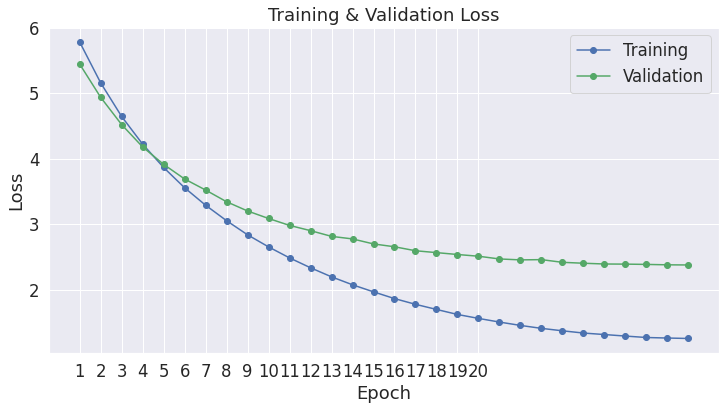

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os
#no need to run during inference

output_dir = 'model_save_categorized_reduced_QC/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_save_categorized_reduced_QC/


('model_save_categorized_reduced_QC/vocab.txt',
 'model_save_categorized_reduced_QC/special_tokens_map.json',
 'model_save_categorized_reduced_QC/added_tokens.json')

In [ ]:
!pip install joblib
import joblib
joblib.dump(LE, "label_encoder")


['label_encoder']

In [ ]:
!zip -r model_save_categorized_reduced_QC.zip model_save_categorized_reduced_QC
# files.download('model_save_categorized_reduced_freeze.zip')

updating: model_save_categorized_reduced_QC/ (stored 0%)
updating: model_save_categorized_reduced_QC/pytorch_model.bin (deflated 7%)
updating: model_save_categorized_reduced_QC/tokenizer_config.json (stored 0%)
updating: model_save_categorized_reduced_QC/config.json (deflated 77%)
updating: model_save_categorized_reduced_QC/vocab.txt (deflated 53%)
updating: model_save_categorized_reduced_QC/special_tokens_map.json (deflated 40%)


In [ ]:
!zip -r label_encoder_categorized_reduced_QC.zip label_encoder
# files.download('label_encoder_categorized_reduced_round_2.zip')

updating: label_encoder (deflated 71%)
